<a href="https://colab.research.google.com/github/Manu-Gr/Text-Mining---Elon-Musk-Tweets/blob/main/Text_Mining_Assignment_Elon_Musk_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Necessary Libraries** 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import  WordNetLemmatizer

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### **Import Dataset** 

In [ ]:
tweet = pd.read_csv('Elon_musk.csv',encoding='Latin-1')
tweet.drop(['Unnamed: 0'],inplace=True,axis=1)
tweet

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


### **Text Preprocessing** 

In [ ]:
tweet = [Text.strip() for Text in tweet.Text] # remove both the leading and the trailing characters
tweet = [Text for Text in tweet if Text] # removes empty strings, because they are considered in Python as False
tweet[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
# Joining the list into one string/text
tweet_text=' '.join(tweet)
tweet_text[0:1000]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

### Tokeniztion

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweet_text)

In [ ]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweet))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [ ]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [ ]:
# Remove Punctuations 
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[0:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [ ]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [ ]:
from nltk.tokenize import word_tokenize
no_url_text_tokens=word_tokenize(no_url_text)
print(no_url_text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [ ]:
no_url_df =pd.DataFrame(no_url_text_tokens,columns=['messages'])
no_url_df

,messages
0,I
1,
2,m
3,an
4,alien
...,...
17842,U0001F525
17843,Progress
17844,update
17845,August


In [ ]:
# Normalize the data
lower_words=[Text.lower() for Text in no_url_text_tokens]
print(lower_words[100:200])

['a', 'toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'thanks', 'for', 'fixing', 'please', 'unlock', 'my', 'account', 'u0001f923', 'u0001f923', 'this', 'is', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'that', 'won', '\x92', 't', 'give', 'you', 'your', 'private', 'keys', 'should', 'be', 'avoided', 'at', 'all', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'has', 'selected', 'falcon', 'heavy', 'to', 'launch', 'the', 'first', 'two', 'elements', 'of', 'the', 'lunar', 'gateway', 'together', 'on', 'one', 'mission', 'yes', 'once', 'we', 'can', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'will', 'ipo', 'starlink', 'is', 'a', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'if', 'we', 'don', 'spacex', 'needs', 'to', 'pass', 'through', 'a', 'deep']


In [ ]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['a', 'toddler', 'hodler', 'he', 'definit', 'ha', 'issu', 'but', 'the', 'sentenc', 'seem', 'a', 'bit', 'high', 'thank', 'for', 'fix', 'pleas', 'unlock', 'my', 'account', 'u0001f923', 'u0001f923', 'thi', 'is', 'true', 'power', 'haha', 'ani', 'crypto', 'wallet', 'that', 'won', '\x92', 't', 'give', 'you', 'your', 'privat', 'key', 'should', 'be', 'avoid', 'at', 'all', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'ha', 'select', 'falcon', 'heavi', 'to', 'launch', 'the', 'first', 'two', 'element', 'of', 'the', 'lunar', 'gateway', 'togeth', 'on', 'one', 'mission', 'ye', 'onc', 'we', 'can', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'will', 'ipo', 'starlink', 'is', 'a', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'if', 'we', 'don', 'spacex', 'need', 'to', 'pass', 'through', 'a', 'deep']


In [ ]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

i  m an alien ray tracing on cyberpunk with hdr is nextlevel have you tried it great interview doge is underestimated congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge all thought he would fail himself most of all haha thanks indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely just sent some just agree to do clubhouse with it  s getting real bought some dogecoin for lil x so he can be a toddler hodler he definitely has issues but the sentencing seems a bit high thanks for fixing please unlock my account u0001f923 u0001f923 this is true power haha any crypto wallet that won  t give you your private keys should be avoided at all costs your app sucks rt nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission yes once we can predict cash flow reasonably well starlink will ipo star

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['i', '\x92', 'm', 'an', 'alien', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'be', 'nextlevel', 'have', '-PRON-', 'try', '-PRON-', 'great', 'interview', 'doge', 'be', 'underestimated', 'congratulation', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'be', 'the', 'underdoge', 'all', 'think', '-PRON-', 'would', 'fail', '-PRON-', 'most', 'of', 'all', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'be', 'the', 'most', 'likely', 'just', 'send', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', '-PRON-', '\x92', 's', 'get', 'real', 'buy', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', '-PRON-', 'can', 'be', 'a', 'toddler', 'hodler', '-PRON-', 'definitely', 'have', 'issue', 'but', 'the', 'sentencing', 'seem', 'a', 'bit', 'high', 'thank', 'for', 'fix',

In [ ]:
clean_tweets=' '.join(lemmas)
clean_tweets

'i \x92 m an alien ray trace on cyberpunk with hdr be nextlevel have -PRON- try -PRON- great interview doge be underestimated congratulation tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo be the underdoge all think -PRON- would fail -PRON- most of all haha thank indeed tweet definitely do not represent realworld time allocation the most entertaining outcome be the most likely just send some just agree to do clubhouse with -PRON- \x92 s get real buy some dogecoin for lil x so -PRON- can be a toddler hodler -PRON- definitely have issue but the sentencing seem a bit high thank for fix please unlock -PRON- account u0001f923 u0001f923 this be true power haha any crypto wallet that win \x92 t give -PRON- -PRON- private key should be avoid at all cost -PRON- app suck rt nasa have select falcon heavy to launch the first two element of the lunar gateway together on one mission yes once -PRON- can predict cash flow reasonably well star

##### **Feature Extraction**

###### **Count Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
tweetscv=cv.fit_transform(lemmas)

In [ ]:
print(cv.vocabulary_)

{'an': 226, 'alien': 196, 'ray': 2353, 'trace': 3017, 'on': 2030, 'cyberpunk': 767, 'with': 3374, 'hdr': 1365, 'be': 374, 'nextlevel': 1959, 'have': 1360, 'pron': 2286, 'try': 3047, 'great': 1310, 'interview': 1557, 'doge': 892, 'underestimated': 3182, 'congratulation': 675, 'tesla': 2926, 'china': 585, 'for': 1180, 'amazing': 219, 'execution': 1061, 'last': 1641, 'year': 3403, 'now': 1987, 'to': 2985, 'the': 2941, 'next': 1958, 'even': 1034, 'more': 1895, 'happy': 1345, 'new': 1956, 'of': 2020, 'ox': 2089, 'frodo': 1210, 'underdoge': 3181, 'all': 198, 'think': 2953, 'would': 3388, 'fail': 1095, 'most': 1899, 'haha': 1334, 'thank': 2937, 'indeed': 1497, 'tweet': 3062, 'definitely': 805, 'do': 886, 'not': 1982, 'represent': 2419, 'realworld': 2368, 'time': 2977, 'allocation': 200, 'entertaining': 1005, 'outcome': 2067, 'likely': 1693, 'just': 1599, 'send': 2563, 'some': 2699, 'agree': 181, 'clubhouse': 614, 'get': 1271, 'real': 2363, 'buy': 503, 'dogecoin': 894, 'lil': 1694, 'so': 2688,

In [ ]:
print(cv.get_feature_names()[100:200])


['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'accelerated', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertising', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'again', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


###### **Count Vectorizer with N grams**

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'all', 'also', 'an', 'and', 'as', 'at', 'be', 'but', 'by', 'can', 'car', 'come', 'could', 'crew', 'day', 'do', 'dragon', 'earth', 'engine', 'exactly', 'falcon', 'few', 'first', 'flight', 'for', 'from', 'get', 'go', 'good', 'great', 'haha', 'have', 'high', 'if', 'in', 'just', 'land', 'launch', 'like', 'lot', 'make', 'maybe', 'mission', 'model', 'more', 'most', 'much', 'need', 'new', 'next', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'out', 'people', 'probably', 'production', 'pron', 're', 'rt', 'should', 'so', 'some', 'soon', 'spacex', 'starship', 'still', 'sure', 'tesla', 'test', 'than', 'thank', 'that', 'the', 'there', 'think', 'this', 'time', 'to', 'too', 'true', 'u0001f923', 'up', 'use', 'very', 'well', 'what', 'will', 'with', 'work', 'would', 'yeah', 'year', 'yes']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### **Generate Word Cloud**

In [ ]:
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

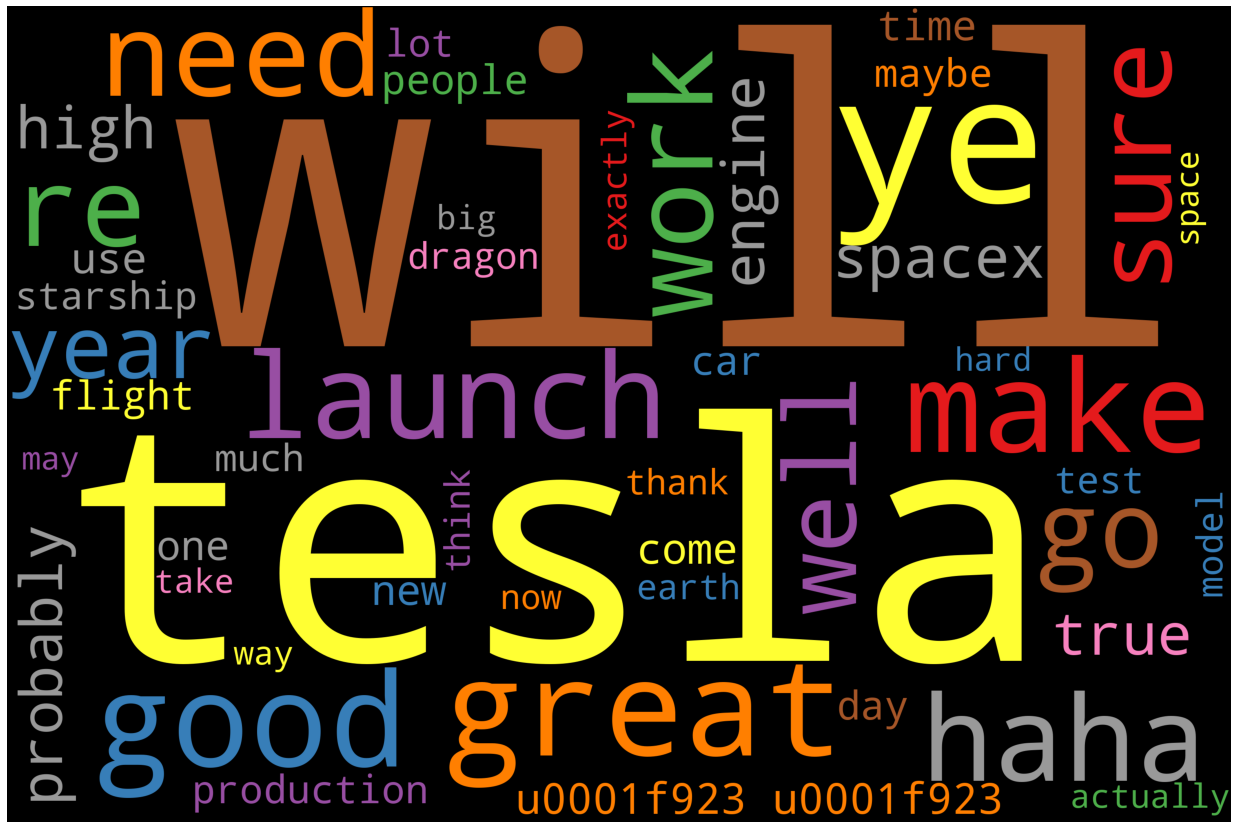

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(25, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

### **Named Entity Recognition**

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)   

a DET
toddler NOUN
hodler NOUN
-PRON- PUNCT
definitely ADV
have AUX
issue NOUN
but CCONJ
the DET
sentencing NOUN
seem VERB
a DET
bit NOUN
high ADJ
thank NOUN
for ADP
fix NOUN
please INTJ
unlock NOUN
-PRON- PUNCT
account NOUN
u0001f923 X
u0001f923 X
this DET
be AUX
true ADJ
power NOUN
haha ADP
any DET
crypto ADJ
wallet NOUN
that DET
win VERB
 NOUN
t NOUN
give NOUN
-PRON- PUNCT
-PRON- ADJ
private ADJ
key NOUN
should VERB
be AUX
avoid VERB
at ADV
all ADV
cost NOUN
-PRON- PUNCT
app NOUN
suck NOUN
rt PROPN
nasa PROPN
have AUX
select ADJ
falcon NOUN
heavy ADJ
to PART
launch VERB
the DET
first ADJ
two NUM
element NOUN
of ADP
the DET
lunar ADJ
gateway NOUN
together ADV
on ADP
one NUM
mission NOUN
yes INTJ
once ADV
-PRON- PUNCT
can VERB
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
will VERB
ipo VERB
starlink VERB
be AUX
a DET
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
if SCONJ
-PRON- PUNCT
don PROPN
spacex PROPN
need VERB
to PA

In [ ]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['prize', 'receive', 'stock', 'comp', 'be', 'stock', 'option', 'take', 'table', '\x92', 'work', 'go', 'seem', 'bit', 'appear', 'fix', 'coin', 'unit', 'time', 'launch', 'tower', 'can', 'stack', 'raptor', 'orbit', 'improve', 'ship', 'booster', 'work', 'tonight', 'ð', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'let', 'doge', 'hodl', 'come', '\x92', 's', 'crypto', '-PRON-', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'read', '-PRON-', 'kingdom', 'hear', 'name', '\x92', 'thing', 'restaurant', 'hang', 'stranger', 'currency', 'earth', 'scratch', 'destiny', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'will', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'isp', 'would', 'seem', 'raptor', 'mu', 'will', 'launch', 'will', 'collect', 'datum', 'galaxy']


In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,will,174
1,be,64
2,make,63
3,launch,62
4,can,58
5,need,52
6,should,49
7,work,49
8,year,48
9,go,44


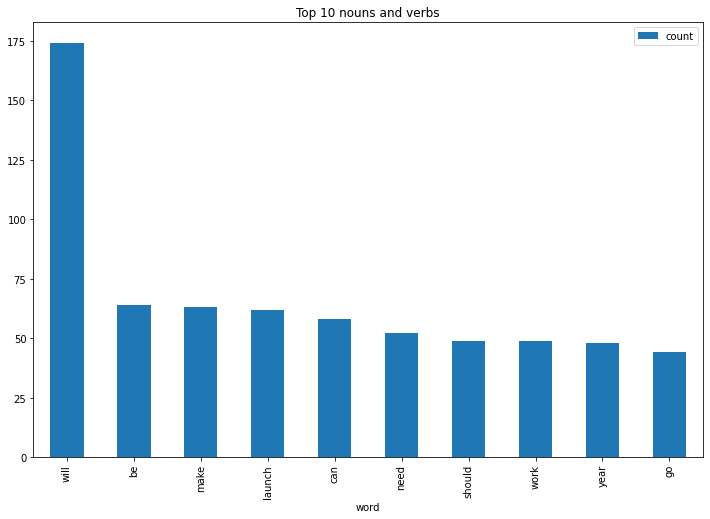

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

### **Emotion Mining - Sentiment Analysis**

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweet))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
# Emotion Lexicon - Affin
affin=pd.read_csv('/content/Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# manual testing
calculate_sentiment(text='great')

3

In [ ]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [ ]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
920,"It may never pay out, as the stock cant b ht...",-4,31
680,"Occasional flights from land are ok, but frequ...",-4,39
611,"Then static fire, checkouts, static fire, fly ...",-4,12
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,16,72


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.497835
std        2.763913
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [ ]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [ ]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",2,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",7,15
917,This is both great &amp; terrifying.,3,6


In [ ]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


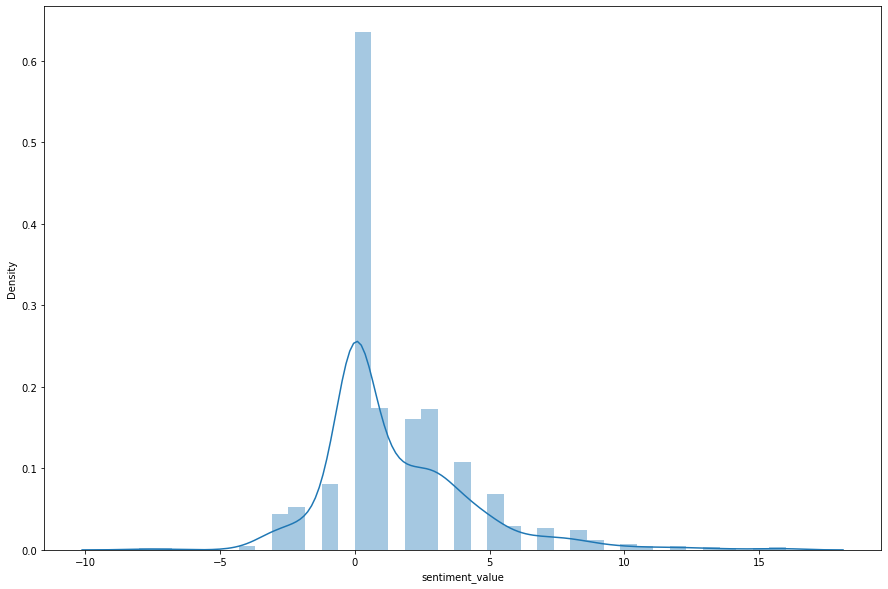

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

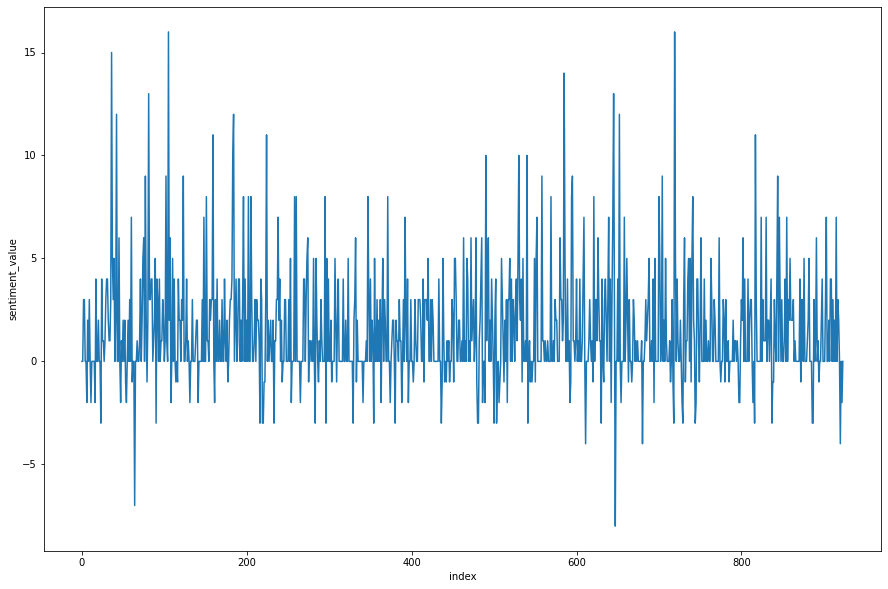

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

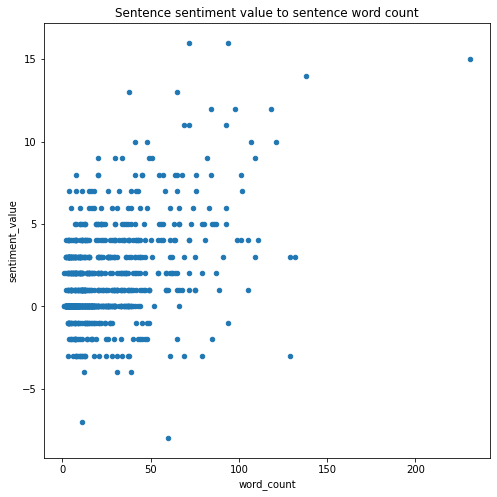

In [ ]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')